In [ ]:
from keras.models import Sequential, load_model
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop
from keras.losses import categorical_crossentropy
from keras.activations import relu, softmax
from keras.src.callbacks import History, EarlyStopping, ModelCheckpoint
from keras.applications import VGG19, RegNetX032
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
DATASET_PATH: str = '/content/drive/MyDrive/datasets/17Flowers/'
INPUT_SHAPE: tuple[int, int, int] = (244, 244, 3)
EPOCHS: int = 40
MODEL_PATH_TO_SAVE: str = f'/content/drive/MyDrive/17_flowers_classification_{EPOCHS}ep.kears'

## Load The Dataset

In [ ]:
train_idg = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=.1
)

In [ ]:
train_dataset = train_idg.flow_from_directory(
        DATASET_PATH + 'train',
        target_size=INPUT_SHAPE[:2],
        batch_size=32,
        subset='training'
)

validation_dataset = train_idg.flow_from_directory(
        DATASET_PATH + 'train',
        target_size=INPUT_SHAPE[:2],
        batch_size=32,
        subset='validation'
)

Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.


## Training

In [ ]:
# vgg = VGG19(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
regnet = RegNetX032(include_top=False , weights="imagenet", input_shape=INPUT_SHAPE)
regnet.summary()

In [ ]:
model = Sequential([
    regnet,
    layers.Flatten(),

    layers.Dense(512, activation=relu),
    layers.Dropout(0.2),

    layers.Dense(256, activation=relu),
    layers.Dropout(0.2),

    layers.Dense(17, activation=softmax, name='Output_layer')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 regnetx032 (Functional)     (None, 8, 8, 1008)        14350112  
                                                                 
 flatten_5 (Flatten)         (None, 64512)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               33030656  
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 Output_layer (Dense)        (None, 17)               

In [ ]:
model.compile(
    optimizer=Adam(),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)
checkpoint = ModelCheckpoint(MODEL_PATH_TO_SAVE, save_best_only=True)
stop = EarlyStopping(patience=7)

In [ ]:
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset,
    callbacks=[stop, checkpoint]
)

Epoch 1/40
29/29 [==============================] - 189s 4s/step - loss: 6.7990 - accuracy: 0.2216 - val_loss: 2.9438 - val_accuracy: 0.1368
Epoch 2/40
29/29 [==============================] - 59s 2s/step - loss: 1.1885 - accuracy: 0.6065 - val_loss: 0.7670 - val_accuracy: 0.7474
Epoch 3/40
29/29 [==============================] - 59s 2s/step - loss: 0.7048 - accuracy: 0.7859 - val_loss: 0.6999 - val_accuracy: 0.7579
Epoch 4/40
29/29 [==============================] - 59s 2s/step - loss: 0.3795 - accuracy: 0.8811 - val_loss: 0.4445 - val_accuracy: 0.8526
Epoch 5/40
29/29 [==============================] - 26s 882ms/step - loss: 0.3760 - accuracy: 0.8930 - val_loss: 0.5977 - val_accuracy: 0.8316
Epoch 6/40
29/29 [==============================] - 24s 819ms/step - loss: 0.2773 - accuracy: 0.9232 - val_loss: 1.0331 - val_accuracy: 0.7789
Epoch 7/40
29/29 [==============================] - 43s 1s/step - loss: 0.5107 - accuracy: 0.8735 - val_loss: 1.3796 - val_accuracy: 0.6947
Epoch 8/40
29

In [ ]:
model = load_model(MODEL_PATH_TO_SAVE)
model.evaluate(validation_dataset)

3/3 [==============================] - 7s 1s/step - loss: 0.2415 - accuracy: 0.9263


[0.24151942133903503, 0.9263157844543457]

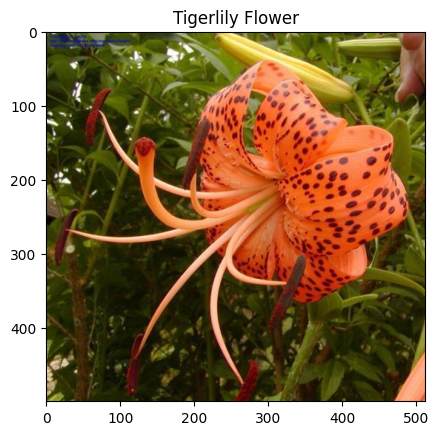

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

test_img = cv.imread('/content/drive/MyDrive/datasets/17Flowers/test/tigerlily/image_0493.jpg')
plt.title('Tigerlily Flower')
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))

In [ ]:
flowers = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
          'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']

test_img = cv.resize(test_img, INPUT_SHAPE[:2])
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
test_img = test_img / 255.
flowers[np.argmax(model.predict(
    np.expand_dims(test_img, axis=0)
))]

1/1 [==============================] - 0s 33ms/step


'tigerlily'